# PREAMBULE :

# INSTALLATIONS RECURRENTES :

# INSTALLATION IMBLEARN :

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# INSTALLATION PANDAS :

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# INSTALLATION SCIKIT LEARN :

In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# INSTALLATION SEABORN :

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# INSTALLATION SHAP :

In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


# IMPORTATION BIBLIOTHEQUES :

In [6]:
# Importation des Bibliothèques :

import matplotlib.colors 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from time import time
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import model_selection
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.feature_selection import RFECV
from imblearn.under_sampling  import RandomUnderSampler
from collections import Counter

# I LECTURE ET SPLIT DES DATASETS ENCODEES ET STANDARDISEES :

# A- LECTURE :

Nos données sont scindées en 3 datasets :
    
- Train

- Test

- Target

In [7]:
# Lecture du Dataset Principal :

data_train_final_feat_eng_preprocessed = pd.read_csv('data_train_final_feat_eng_preprocessed.csv', index_col='SK_ID_CURR', encoding ='utf-8')

data_train_final_feat_eng_preprocessed.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,0.0,0.001512,0.090287,0.090032,0.077441,0.256321,0.888839,0.964437,0.852140,0.705433,...,0,0,0,0,0,0,1,0,1,0
100003,0.0,0.002089,0.311736,0.132924,0.271605,0.045016,0.477114,0.933676,0.951929,0.959566,...,0,1,0,0,0,0,0,0,1,0
100004,0.0,0.000358,0.022472,0.020025,0.023569,0.134897,0.348534,0.987439,0.827335,0.648326,...,0,0,0,0,0,0,0,0,0,0
100006,0.0,0.000935,0.066837,0.109477,0.063973,0.107023,0.350846,0.830337,0.601451,0.661387,...,0,0,0,0,0,0,0,0,0,0
100007,0.0,0.000819,0.116854,0.078975,0.117845,0.392880,0.298591,0.830393,0.825268,0.519522,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Lecture du Dataset Principal :

data_test_final_feat_eng_preprocessed = pd.read_csv('data_test_final_feat_eng_preprocessed.csv', index_col='SK_ID_CURR', encoding ='utf-8')

data_test_final_feat_eng_preprocessed.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.00,0.024654,0.238037,0.102453,0.184049,0.257380,0.333427,0.866682,0.782059,0.872086,...,0,0,0,0,0,0,1,0,1,0
100005,0.00,0.016440,0.080785,0.084558,0.061350,0.491855,0.399339,0.744130,0.615631,0.744329,...,0,0,0,0,0,0,0,0,0,0
100013,0.00,0.040054,0.280965,0.378515,0.265849,0.260854,0.288794,0.744760,0.908313,0.448173,...,0,0,0,0,0,0,0,0,0,0
100028,0.10,0.065721,0.695297,0.262078,0.695297,0.361760,0.628269,0.893197,0.915690,0.337114,...,0,0,0,0,0,1,0,0,1,0
100038,0.05,0.034920,0.263804,0.166995,0.263804,0.135340,0.680685,0.874585,0.831380,0.328607,...,0,0,0,0,0,0,0,0,0,0


# VARIABLE CIBLE :

In [9]:
# Lecture du Dataset TARGET :

TARGET = pd.read_csv('TARGET.csv', index_col='SK_ID_CURR', encoding ='utf-8')

TARGET.head(5)

,TARGET
SK_ID_CURR,
100002,1.0
100003,0.0
100004,0.0
100006,0.0
100007,0.0


# B- SPLIT : TRAIN 70% - TEST 30 % :

In [10]:
# Train / Test Split :

X_train, X_test, y_train, y_test = train_test_split(data_train_final_feat_eng_preprocessed.values, TARGET.values, test_size=0.3, random_state=42)

In [11]:
# Train / Test Shape :

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((215257, 314), (92254, 314), (215257, 1), (92254, 1))

In [12]:
# Sauvegarde :

pd.DataFrame(X_train).to_csv('X_train.csv',index=False)

pd.DataFrame(X_test).to_csv('X_test.csv',index=False)

pd.DataFrame(y_train).to_csv('y_train.csv',index=False)

pd.DataFrame(y_test).to_csv('y_test.csv',index=False)

# II MODELISATIONS : 

# A- RESAMPLING : 

# 1- OVERSAMPLING : SMOTE :

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires.

On procède à un sur-échantillonnage (oversampling).

Le nombre d’individus minoritaires est augmenté pour qu’ils aient plus d’importance lors de la modélisation. Le but est de créer des Observations synthétiques.

In [13]:
# Visualisation Avant SMOTE :

print("Label 1, Avant d'utiliser SMOTE: {} ".format(sum(y_train==1)))
print("Label 0, Avant d'utiliser SMOTE: {} ".format(sum(y_train==0)))

Label 1, Avant d'utiliser SMOTE: [17412] 
Label 0, Avant d'utiliser SMOTE: [197845] 


In [14]:
# Oversampling SMOTE :

sm = SMOTE(random_state=2) 

X_train_oversamp, y_train_oversamp = sm.fit_resample(X_train, y_train)

In [15]:
# Visualisation Après SMOTE :

print("Label 1, Après avoir utilisé SMOTE : {}".format(sum(y_train_oversamp==1)))
print("Label 0, Après avoir utilisé SMOTE : {}".format(sum(y_train_oversamp==0)))

Label 1, Après avoir utilisé SMOTE : 197845
Label 0, Après avoir utilisé SMOTE : 197845


In [16]:
# Sauvegarde :

pd.DataFrame(X_train_oversamp).to_csv('X_train_oversamp.csv',index=False)

pd.DataFrame(y_train_oversamp).to_csv('y_train_oversamp.csv',index=False)

# 2- UNDERSAMPLING : RandomUnderSampler :

C’est une méthode naïve où les classes qui ont peu d’exemples sont générées et rééchantillonnées de manière aléatoire.

In [17]:
# RandomUnderSampler :

smt = RandomUnderSampler()

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

In [18]:
# Visualisation de la Cible :

app_train = pd.read_csv('application_train.csv', index_col='SK_ID_CURR', encoding ='utf-8')

app_train["TARGET"].head(5)

SK_ID_CURR
100002    1
100003    0
100004    0
100006    0
100007    0
Name: TARGET, dtype: int64

In [19]:
# Décompte :

print('Structure du Dataset Original %s' % Counter(app_train["TARGET"]))

print('Structure du Dataset sous échantillonné %s' % Counter(y_train_smt))

Structure du Dataset Original Counter({0: 282686, 1: 24825})
Structure du Dataset sous échantillonné Counter({0.0: 17412, 1.0: 17412})


In [20]:
# Sauvegarde :

pd.DataFrame(X_train_smt).to_csv('X_train_smt.csv',index=False)

pd.DataFrame(y_train_smt).to_csv('y_train_smt.csv',index=False)

# B- MODELES DE CLASSIFICATION :

In [21]:
# Résultats :

results = pd.DataFrame({})

# 1- SECTEUR BANCAIRE :

La Métrique Métier, dédiée au Secteur Bancaire, consiste à calculer le gain obtenu pour l'ensemble des individus du dataset. On va donc pénaliser le défaut de paiement (avec une pondération importante correspondant aux potentielles pertes en capital) et majorer un remboursement (faible pondération correspondant aux intérêts générés). 

Pondération Arbitraire :
    
- fn_valeur = - 2.5
- tp_valeur = 0
- tn_valeur = 1.5
- fp_valeur = - 1

In [22]:
# Importation :

from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, classification_report, f1_score

In [23]:
# Fonction Métrique Bancaire :

def score_bancaire(y_true, y_pred, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5):
    
    cm = confusion_matrix(y_true,y_pred)
    
    tn = cm[0, 0]
    fn = cm[1, 0]
    fp = cm[0, 1]
    tp = cm[1, 1]
    
    
    Gain_total = tp * tp_valeur + tn * tn_valeur + fp * fp_valeur + fn * fn_valeur
    
    Gain_maximal = (fp + tn) * tn_valeur + (fn + tp) * tp_valeur
    
    Gain_minimal = (fp + tn) * fp_valeur + (fn + tp) * fn_valeur
    
    Gain_normalise = (Gain_total - Gain_minimal)/(Gain_maximal - Gain_minimal)
    
    return Gain_normalise 

# 2- BASELINE : REGRESSION LOGISTIQUE :

La régression logistique est un modèle statistique permettant d'étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. 
Il s'agit d'un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien.

# - ENTRAINEMENT DU MODELE :

In [24]:
# Importation :

from sklearn.linear_model import LogisticRegression

In [25]:
# Instanciation :

logreg = LogisticRegression()

In [26]:
# Sauvegarde Modèle :

filename = 'classifier_logreg_model.sav'

pickle.dump(logreg, open(filename, 'wb'))

In [27]:
# Fit Modèle :

logreg.fit(X_train_smt, y_train_smt)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

# - RESULTATS DE PREDICTION :

In [28]:
# Prédiction :

y_pred_test1 = logreg.predict(X_test)

y_pred_test1

array([1., 0., 1., ..., 0., 0., 1.])

In [29]:
# Accuracy :

Logreg_train = round(logreg.score(X_train_smt, y_train_smt) * 100, 2)

Logreg_accuracy = round(accuracy_score(y_pred_test1, y_test) * 100, 2)

print("Training Accuracy    :", Logreg_train,"%")

print("Modèle Accuracy Score :", Logreg_accuracy,"%")

Training Accuracy    : 69.26 %
Modèle Accuracy Score : 69.09 %


# - MATRICE DE CONFUSION :

Une matrice de confusion est un outil permettant de résumer les performances d'un algorithme de classification. Une matrice de confusion nous donnera une image claire des performances du modèle de classification et des types d'erreurs produites par le modèle. Il nous donne un résumé des prédictions correctes et incorrectes ventilées par chaque catégorie. 

Le résumé est représenté sous forme de tableau.

Quatre types de résultats sont possibles lors de l'évaluation des performances d'un modèle de classification. 

Ces quatre résultats sont décrits ci-dessous : 

- Vrais positifs (TP) : Les vrais positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe et que l'observation appartient réellement à cette classe.

- Vrais négatifs (TN) : Les vrais négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe et que l'observation n'appartient pas à cette classe.

- Faux positifs (FP) : Les faux positifs se produisent lorsque nous prédisons qu'une observation appartient à une certaine classe, mais que l'observation n'appartient pas à cette classe. Ce type d'erreur est appelé erreur de type I.

- Faux négatifs (FN) : Les faux négatifs se produisent lorsque nous prédisons qu'une observation n'appartient pas à une certaine classe, mais que l'observation appartient à cette classe. Il s'agit d'une erreur très grave appelée erreur de type II.

In [30]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_test1)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix

 [[58679 26162]
 [ 2351  5062]]

True Positives(TP) =  58679

True Negatives(TN) =  5062

False Positives(FP) =  26162

False Negatives(FN) =  2351


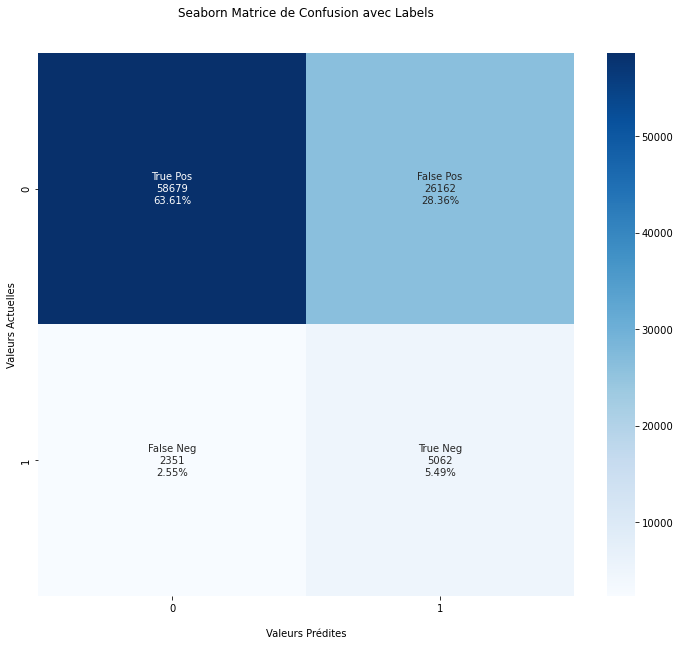

In [31]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm1.flatten()/np.sum(cm1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm1, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- Les résultats par Régression Logistique, mis sous forme de matrice de confusion, sont assez satisfaisants.
- En effet, la classification en TP et TN compte un grand nombre de données. 
- Les erreurs de Type I et de Type II sont aussi élevées.
- Ce type de modélisation est recommandé.

# - RAPPORT DE CLASSIFICATION :

In [32]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.80     84841
         1.0       0.16      0.68      0.26      7413

    accuracy                           0.69     92254
   macro avg       0.56      0.69      0.53     92254
weighted avg       0.90      0.69      0.76     92254



In [33]:
# Paramètres :

TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

In [34]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3091


# Interprétations :

- L'erreur de classification est assez peu élevée.

# - PRECISION :

La précision peut être définie comme le pourcentage de résultats positifs correctement prédits sur tous les résultats positifs prédits. 

Il peut être donné comme le rapport des vrais positifs (TP) à la somme des vrais et des faux positifs (TP + FP).

Ainsi, la précision identifie la proportion de résultats positifs correctement prédits.  Il s'intéresse plus à la classe positive qu'à la classe négative.

In [35]:
# Calcul "Precision Score" :

precision1 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision1))

Precision : 0.6916


# Interprétations :

- La Précision est assez haute. Avec d'autres "classifiers", il serait possible de majorer cette Valeur.

# - RECALL :

Recall peut être défini comme le pourcentage de résultats positifs correctement prédits sur tous les résultats positifs réels.  

Il peut être donné comme le rapport des vrais positifs (TP) à la somme des vrais positifs et des faux négatifs (TP + FN).

In [36]:
# Calcul "Recall Score" :

recall1 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall1))

Recall or Sensitivity : 0.9615


# Interprétations :

- Le résultat est haut, concernant le Recall. La Regression Logistique peut apporter de bons résultats.

# - F1 :

Le F1-score est une métrique de classification qui mesure la capacité d'un modèle à bien prédire les individus positifs, tant en termes de precision (taux de prédictions positives correctes) qu'en termes de recall (taux de positifs correctement prédits).

In [37]:
# Importation :

from sklearn.metrics import f1_score

In [38]:
# Calcul 'weighted' :

f1_logistic_reg = f1_score(y_test, y_pred_test1, average = 'weighted')

f1_logistic_reg

0.7609402640372132

# Interprétations :

Le résultat de F1 est assez haut. La Regression Logistique apporte un peu de Valeur Ajoutée.

# - ROC / AUC :

Un autre outil pour mesurer visuellement les performances du modèle de classification est la courbe ROC.  

La Courbe ROC signifie courbe caractéristique de fonctionnement du récepteur.  

Une courbe ROC est un graphique qui montre les performances d'un modèle de classification à différents niveaux de seuil de classification.

La courbe ROC trace le taux de vrais positifs (TPR) par rapport au taux de faux positifs (FPR) à différents niveaux de seuil.

Le taux de vrais positifs (TPR) est également appelé rappel. Il est défini comme le rapport de TP à (TP + FN).

Le taux de faux positifs (FPR) est défini comme le rapport entre FP et (FP + TN).

Dans la courbe ROC, nous nous concentrerons sur le TPR (True Positive Rate) et le FPR (False Positive Rate) d'un seul point.  

Cela nous donnera la performance générale de la courbe ROC qui se compose du TPR et du FPR à différents niveaux de seuil.  

Ainsi, une courbe ROC trace TPR vs FPR à différents niveaux de seuil de classification.  

Si nous abaissons les niveaux de seuil, il se peut que davantage d'éléments soient classés comme positifs.  

Cela augmentera à la fois les vrais positifs (TP) et les faux positifs (FP).

In [39]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [40]:
# Prédiction :

lr_probs = logreg.predict_proba(X_test)

lr_probs

array([[0.2827639 , 0.7172361 ],
       [0.79026561, 0.20973439],
       [0.39584428, 0.60415572],
       ...,
       [0.76396498, 0.23603502],
       [0.85896551, 0.14103449],
       [0.48734923, 0.51265077]])

In [41]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [42]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc1 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('Régression Logistique : ROC AUC=%.3f' % (lr_auc1))

No Skill: ROC AUC=0.500
Régression Logistique : ROC AUC=0.754


In [43]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

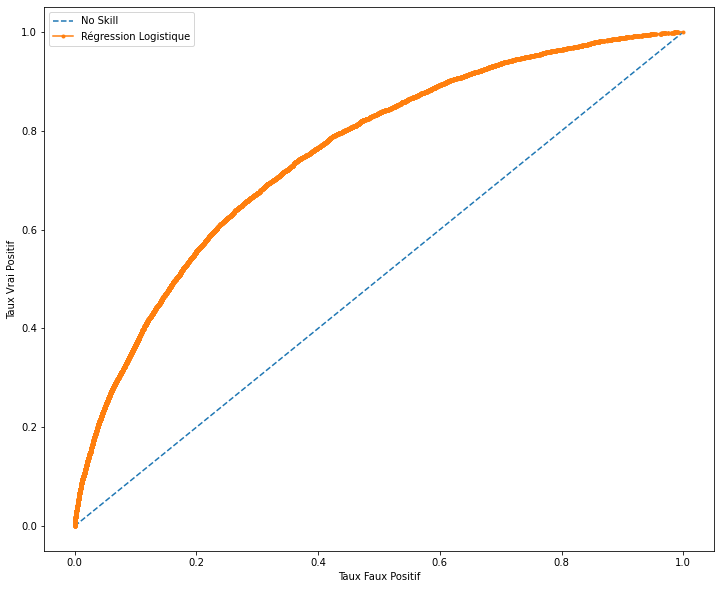

In [44]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Régression Logistique')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La Courbe obtenue par Régression Logistique n'épouse pas l'approche "No Skill". Cette technique de modélisation est assez efficiente.

# - APPLICATION DU METRIQUE BANCAIRE :

In [45]:
# Application :

score_bancaire_log_reg = score_bancaire(y_test, y_pred_test1, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_log_reg

0.6909293905955297

# Interprétations :

- Le Gain est assez élevé. Cela prouve le potentiel de la modélisation par Regression Logistique.

# - RESULTATS :

In [46]:
# Résultats Baseline Médiane :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['Baseline Régression Logistique'],'Precision' : precision1,'Recall' : recall1,'F1' : f1_logistic_reg,
    'ROC_AUC' : lr_auc1,'Score Métier' : score_bancaire_log_reg}), ignore_index=True)

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_36548/3725262039.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# 2- LightGBM :

Light GBM est une structure rapide, appropriée, de renforcement de gradient boosting, dépendant du calcul de l’arbre de choix, utilisée pour le positionnement, la caractérisation et de nombreuses autres missions d’IA. Comme il dépend des calculs de l’arbre de choix, il divise la feuille de l’arbre la mieux adaptée tandis que d’autres calculs de renforcement divisent la profondeur de l’arbre en deux parties, l’une judicieuse et l’autre perspicace, par opposition à la feuille.

In [47]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [48]:
# Importation :

import lightgbm as lgbm

import joblib

In [49]:
# Importation :

from lightgbm import LGBMClassifier

In [50]:
# Instanciation :

lgbm = LGBMClassifier()

In [51]:
# Instanciation :

lgbm1 = LGBMClassifier()

In [52]:
# Sauvegarde Modèle :

filename = 'classifier_lgbm_model.sav'

pickle.dump(lgbm, open(filename, 'wb'))

In [53]:
# Sauvegarde Modèle :

joblib.dump(lgbm1, '/Users/sylvaincarlevato/lgbm.joblib')

['/Users/sylvaincarlevato/lgbm.joblib']

In [54]:
# Fit Modèle :

lgbm.fit(X_train_smt, y_train_smt)

LGBMClassifier()

# - RESULTATS DE PREDICTION :

In [55]:
# Prédiction :

y_pred_test2 = lgbm.predict(X_test)

y_pred_test2

array([1., 0., 1., ..., 0., 0., 0.])

In [56]:
# Accuracy :

lgbm_train = round(lgbm.score(X_train_smt, y_train_smt) * 100, 2)

lgbm_accuracy = round(accuracy_score(y_pred_test2, y_test) * 100, 2)

print("Training Accuracy    :", lgbm_train,"%")

print("Modèle Accuracy Score :", lgbm_accuracy,"%")

Training Accuracy    : 76.76 %
Modèle Accuracy Score : 70.4 %


# - MATRICE DE CONFUSION :

In [57]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_test2)

print('Confusion matrix\n\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix

 [[59766 25075]
 [ 2236  5177]]

True Positives(TP) =  59766

True Negatives(TN) =  5177

False Positives(FP) =  25075

False Negatives(FN) =  2236


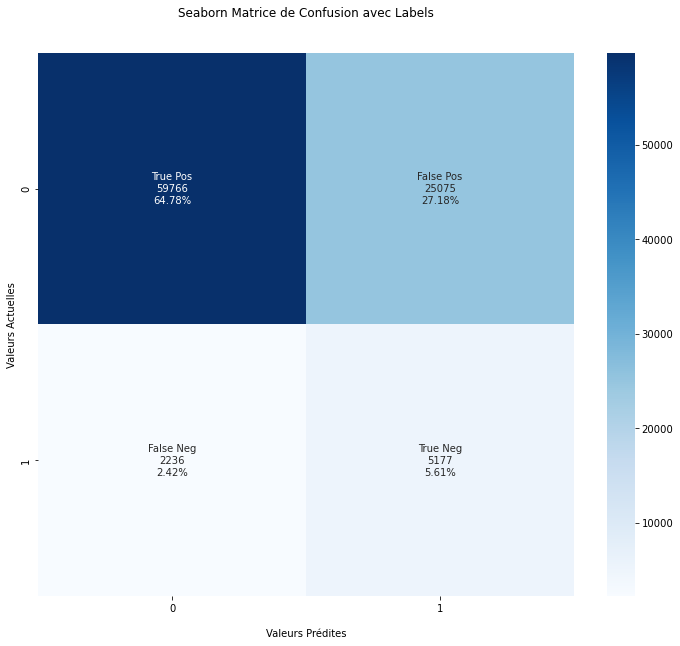

In [58]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm2.flatten()/np.sum(cm2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La classification est quasi située en TP, toutefois, on constate un peu d'erreur de Type II.

# - RAPPORT DE CLASSIFICATION :

In [59]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

         0.0       0.96      0.70      0.81     84841
         1.0       0.17      0.70      0.27      7413

    accuracy                           0.70     92254
   macro avg       0.57      0.70      0.54     92254
weighted avg       0.90      0.70      0.77     92254



In [60]:
# "Classification Accuracy" :

TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

In [61]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2960


# Interprétations :

- L'Erreur de Classification est très basse.

# - PRECISION :

In [62]:
# Calcul "Precision Score" :

precision2 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision2))

Precision : 0.7044


# Interprétations :

- La Précision est absolue. L'approche LightGBM offre d'excellents résultats.

# - RECALL :

In [63]:
# Calcul "Recall Score" :

recall2 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall2))

Recall or Sensitivity : 0.9639


# Interprétations :

- Le Recall est élevé. L'approche LightGBM est pertinente.

# - F1 :

In [64]:
# Importation :

from sklearn.metrics import f1_score

In [65]:
# Calcul 'macro' :

f1_lightgbm = f1_score(y_test, y_pred_test2, average = 'weighted')

f1_lightgbm

0.7706920585585488

# Interprétations :

- Le F1 est, pour ce type de modèle, encore élevé. Ce type de classification est donc efficiente.

# - ROC / AUC :

In [66]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [67]:
# Prédiction :

lr_probs = lgbm.predict_proba(X_test)

lr_probs

array([[0.32356475, 0.67643525],
       [0.7089922 , 0.2910078 ],
       [0.26546217, 0.73453783],
       ...,
       [0.75836545, 0.24163455],
       [0.79296168, 0.20703832],
       [0.79468286, 0.20531714]])

In [68]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [69]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc2 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('LightGBM : ROC AUC=%.3f' % (lr_auc2))

No Skill: ROC AUC=0.500
LightGBM : ROC AUC=0.770


In [70]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

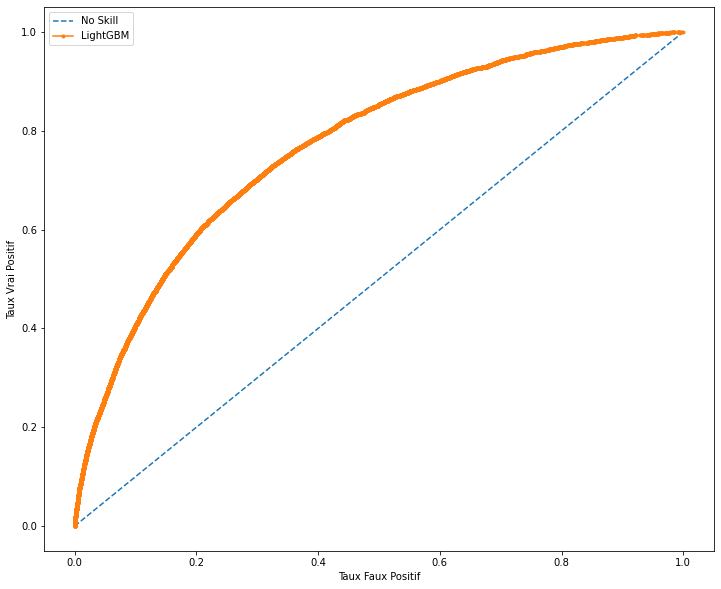

In [71]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='LightGBM')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La valeur de ROC AUC est élevée. La classification est bonne, mais perfectible.

# - METRIQUE BANCAIRE :

In [72]:
# Score Bancaire :

score_bancaire_light_gbm = score_bancaire(y_test, y_pred_test2, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_light_gbm

0.703958635939905

# Interprétations :

La valeur de Score obtenue est assez bonne.

# - FEATURE IMPORTANCE :

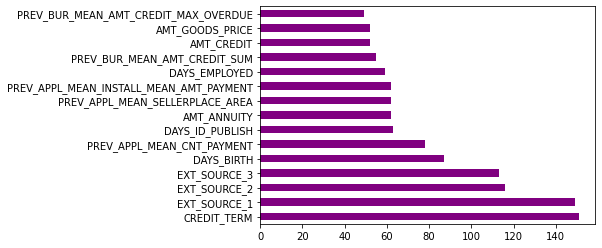

In [73]:
# Application :

feat_importances = pd.Series(lgbm.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

Les variables pesant sur la classification sont les variables de Crédit et de Sources Extérieures.

# - SHAP IMPORTANCE :

In [74]:
# Importation :

import shap

In [75]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [76]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(lgbm)

shap_values = explainer.shap_values(X_importance)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


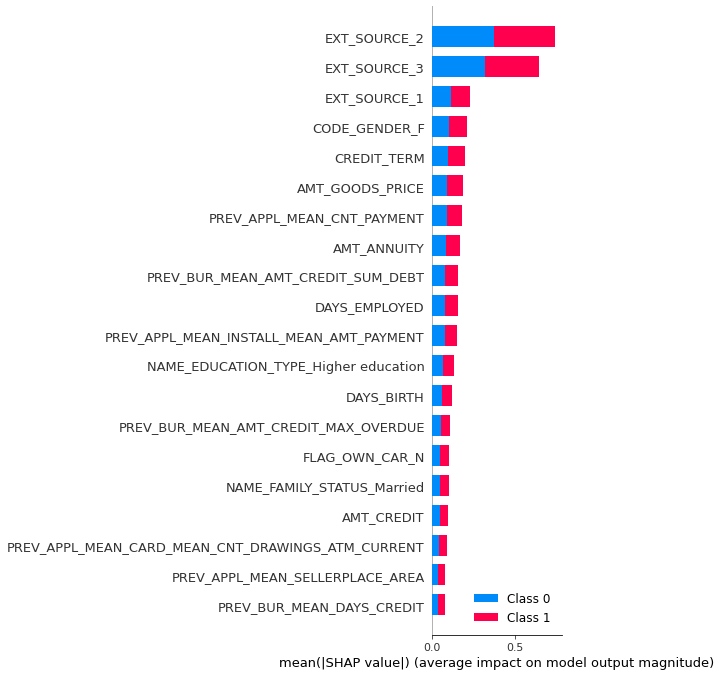

In [77]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- Les Sources Extérieures ont un impact sur l'orientation du modèle.

# - RESULTATS :

In [78]:
# Résultats LIGHTGBM :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['LightGBM'],'Precision' : precision2, 'Recall' : recall2, 'F1':f1_lightgbm,
    'ROC_AUC': lr_auc2, 'Score Métier' : score_bancaire_light_gbm}),
              ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 3- CATBOOST :

CatBoost est un algorithme de gradient boosting basé sur les arbres de décision.  

In [79]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [80]:
# Importation :

from catboost import CatBoostClassifier

In [81]:
# Instanciation :

clf = CatBoostClassifier(iterations=10, verbose=5)

In [82]:
# Sauvegarde Modèle :

filename = 'classifier_clf_model.sav'

pickle.dump(clf, open(filename, 'wb'))

In [83]:
# Fit Modèle :

clf.fit(X_train_smt, y_train_smt)

Learning rate set to 0.5
0:	learn: 0.6440422	total: 77.1ms	remaining: 694ms
5:	learn: 0.5921083	total: 137ms	remaining: 91.4ms
9:	learn: 0.5803526	total: 187ms	remaining: 0us


# - RESULTATS DE PREDICTION :

In [84]:
# Prédiction :

y_pred_test3 = clf.predict(X_test)

y_pred_test3

array([1., 0., 1., ..., 0., 0., 0.])

# - MATRICE DE CONFUSION :

In [85]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_test3)

print('Confusion matrix\n\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix

 [[58818 26023]
 [ 2356  5057]]

True Positives(TP) =  58818

True Negatives(TN) =  5057

False Positives(FP) =  26023

False Negatives(FN) =  2356


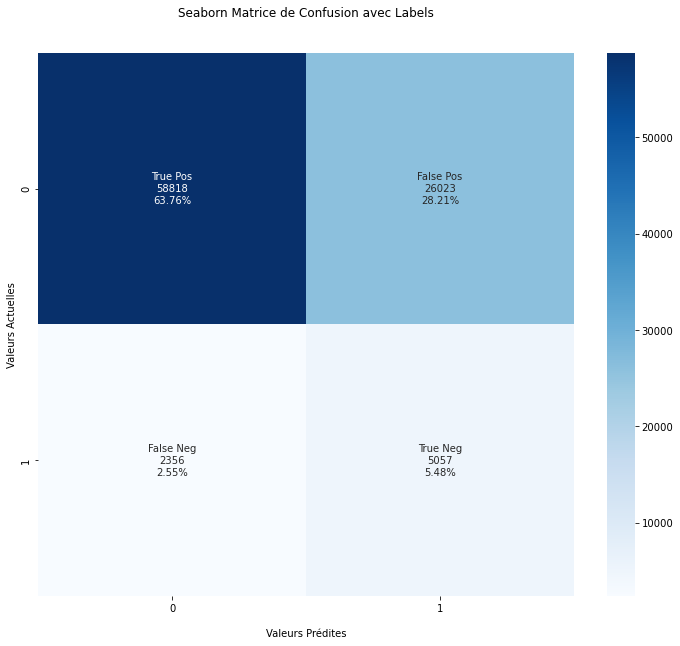

In [86]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm3.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm3.flatten()/np.sum(cm3)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm3, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La classification est meilleure. 
- Il y a beaucoup de faux positifs.
- L'erreur de Type II est peu élevée, toutefois.

# - RAPPORT DE CLASSIFICATION :

In [87]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test3))

              precision    recall  f1-score   support

         0.0       0.96      0.69      0.81     84841
         1.0       0.16      0.68      0.26      7413

    accuracy                           0.69     92254
   macro avg       0.56      0.69      0.53     92254
weighted avg       0.90      0.69      0.76     92254



In [88]:
# "Classification Accuracy" :

TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

In [89]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3076


# Interprétations :

- L'erreur de classification est très basse. L'approche CatBoost est donc plutôt efficiente.

# - PRECISION :

In [90]:
# Calcul "Precision Score" :

precision3 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision3))

Precision : 0.6933


# Interprétations :

- La Valeur de Précision est haute et confirme la qualité de cette approche.

# - RECALL :

In [91]:
# Calcul "Recall Score" :

recall3 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall3))

Recall or Sensitivity : 0.9615


# Interprétations :

- La Valeur du Recall est excellente. L'approche Catboost est efficiente.

# - F1 :

In [92]:
# Importation :

from sklearn.metrics import f1_score

In [93]:
# Calcul 'weight' :

f1_catboost = f1_score(y_test, y_pred_test3, average = 'weighted')

f1_catboost

0.7620194065635216

# Interprétations :

- Le F1 est assez élevé. Les données sont donc correctement prédites.

# - ROC / AUC :

In [94]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [95]:
# Prédiction :

lr_probs = clf.predict_proba(X_test)

lr_probs

array([[0.32010026, 0.67989974],
       [0.51090607, 0.48909393],
       [0.48645673, 0.51354327],
       ...,
       [0.66874006, 0.33125994],
       [0.8171016 , 0.1828984 ],
       [0.57518684, 0.42481316]])

In [96]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [97]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc3 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('Catboost : ROC AUC=%.3f' % (lr_auc3))

No Skill: ROC AUC=0.500
Catboost : ROC AUC=0.753


In [98]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

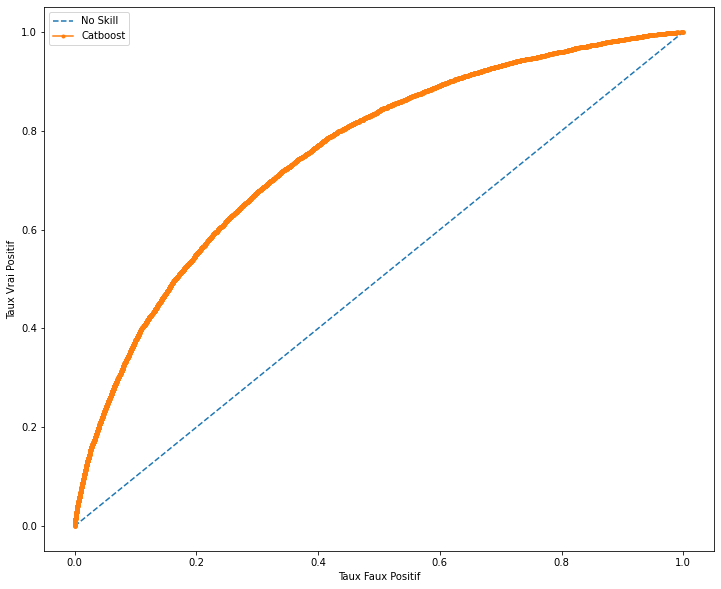

In [99]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Catboost')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- La Courbe ROC est très prononcée et se démarque de la Courbe No Skill. La classification par Catboost est donc assez efficace. Toutefois, la valeur de ROC AUC est perfectible.

# - APPLICATION METRIQUE BANCAIRE :

In [100]:
# Application :

score_bancaire_cat_boost = score_bancaire(y_test, y_pred_test3, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_cat_boost

0.6923819021397446

# Interprétations :

- Le score bancaire est excellent. Cette technique de modélisation garantit une certaine rentabilité.

# - FEATURE IMPORTANCE :

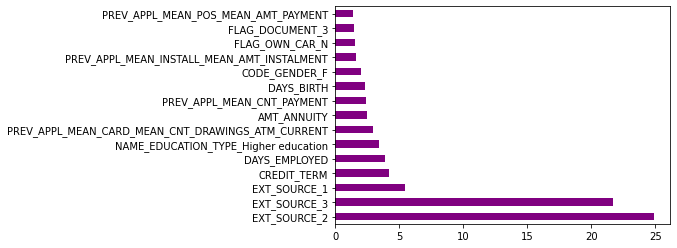

In [101]:
# Application :

feat_importances = pd.Series(clf.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

- Les variables pesant sur la classification sont les variables de Sources Extérieures.

# - SHAP IMPORTANCE :

In [102]:
# Importation :

import shap

In [103]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [104]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(clf)

shap_values = explainer.shap_values(X_importance)

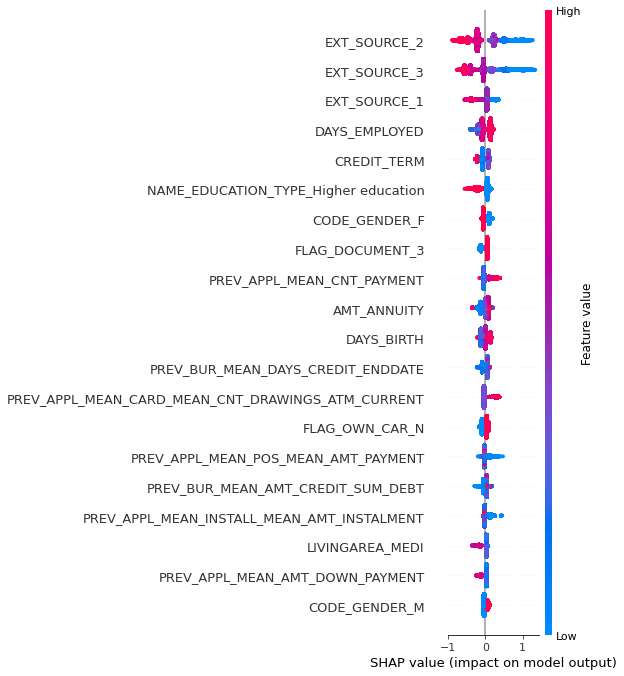

In [105]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- Les Sources Extérieures influent sur les Valeurs SHAP et a donc un impact sur le Comportement du Modèle.

# - RESULTATS :

In [106]:
# Résultats CATBOOST :

import math
results = results.append(pd.DataFrame({
    'Modèle' : ['CATBOOST'],'Precision' : precision3, 'Recall' : recall3, 'F1' : f1_catboost,
    'ROC_AUC': lr_auc3, 'Score Métier' : score_bancaire_cat_boost}), ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 4- XGBOOST :

XGBoost est une implémentation évolutive et très précise de l'amplification de gradient qui repousse les limites de la puissance de calcul pour les algorithmes d'arbres boostés, conçue en grande partie pour dynamiser les performances du modèle d'apprentissage automatique et la vitesse de calcul.

In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# - ENTRAINEMENT DU MODELE :

In [108]:
# Importation :

import xgboost as xgb

In [109]:
# Importation :

from xgboost import XGBClassifier

In [110]:
# Instanciation :

xgb = XGBClassifier(n_estimators=5)

In [111]:
# Sauvegarde Modèle :

filename = 'classifier_xgb_model.sav'

pickle.dump(xgb, open(filename, 'wb'))

In [112]:
# Sauvegarde Modèle :

filename = 'classifier_xgb_model.pkl'

pickle.dump(xgb, open(filename, 'wb'))

In [113]:
# Fit Modèle :

xgb.fit(X_train_smt, y_train_smt)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=5, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# - RESULTATS DE PREDICTION :

In [114]:
# Prédiction :

y_pred_test4 = xgb.predict(X_test)

y_pred_test4

array([1, 0, 1, ..., 0, 0, 0])

# - MATRICE DE CONFUSION :

In [115]:
# Matrice de Confusion :

from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_test4)

print('Confusion matrix\n\n', cm4)

print('\nTrue Positives(TP) = ', cm4[0,0])

print('\nTrue Negatives(TN) = ', cm4[1,1])

print('\nFalse Positives(FP) = ', cm4[0,1])

print('\nFalse Negatives(FN) = ', cm4[1,0])

Confusion matrix

 [[57088 27753]
 [ 2411  5002]]

True Positives(TP) =  57088

True Negatives(TN) =  5002

False Positives(FP) =  27753

False Negatives(FN) =  2411


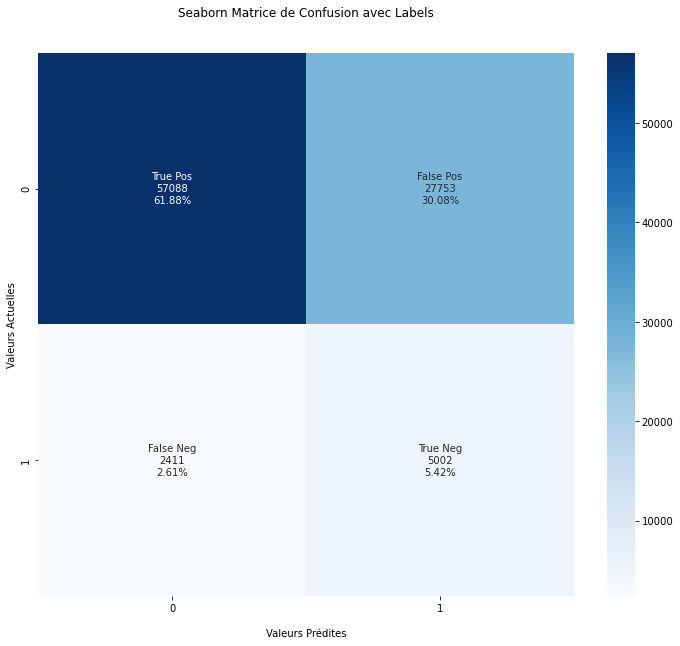

In [116]:
# Plot :

plt.figure(figsize = (12, 10))

group_names = ['True Pos','False Pos','False Neg','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in
                cm4.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm4.flatten()/np.sum(cm4)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm4, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Matrice de Confusion avec Labels\n\n');
ax.set_xlabel('\nValeurs Prédites')
ax.set_ylabel('Valeurs Actuelles');

plt.show()

# Interprétations :

- La Classification est constituée de TP et de FP. Il y a très peu d'erreurs de Type II.

# - RAPPORT DE CLASSIFICATION :

In [117]:
# Rapport :

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test4))

              precision    recall  f1-score   support

         0.0       0.96      0.67      0.79     84841
         1.0       0.15      0.67      0.25      7413

    accuracy                           0.67     92254
   macro avg       0.56      0.67      0.52     92254
weighted avg       0.89      0.67      0.75     92254



In [118]:
# "Classification Accuracy" :

TP = cm4[0,0]
TN = cm4[1,1]
FP = cm4[0,1]
FN = cm4[1,0]

In [119]:
# Calcul "Classification Error" :

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3270


# Interprétations :

- L'Erreur de Classification est très basse. L'approche XGBOOST apporte de bons résultats.

# - PRECISION :

In [120]:
# Calcul "Precision Score" :

precision4 = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision4))

Precision : 0.6729


# Interprétations :

- La Valeur de Précision n'est pas optimale, comparativement aux autres modèles.

# - RECALL :

In [121]:
# Calcul "Recall Score" :

recall4 = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall4))

Recall or Sensitivity : 0.9595


# Interprétations :

- Le Recall est également très bon. La Modélisation XGBOOST apporte de Bons Résultats.

# - F1 :

In [122]:
# Importation :

from sklearn.metrics import f1_score

In [123]:
# Calcul 'weighted' :

f1_xgboost = f1_score(y_test, y_pred_test4, average = 'weighted')

f1_xgboost

0.7474718356782387

# Interprétations :

- La Valeur de F1 est assez élevée pour la modélisation XGBOOST.

# - ROC / AUC :

In [124]:
# Importations :

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [125]:
# Prédiction :

lr_probs = xgb.predict_proba(X_test)

lr_probs

array([[0.3017602 , 0.6982398 ],
       [0.54983705, 0.45016295],
       [0.39304513, 0.6069549 ],
       ...,
       [0.5661045 , 0.43389553],
       [0.6760959 , 0.3239041 ],
       [0.50195205, 0.49804798]], dtype=float32)

In [126]:
# Probabilités :

lr_probs = lr_probs[:, 1]

In [127]:
# Calcul Scores :

ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)

lr_auc4 = roc_auc_score(y_test, lr_probs)

print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('XGBOOST : ROC AUC=%.3f' % (lr_auc4))

No Skill: ROC AUC=0.500
XGBOOST : ROC AUC=0.734


In [128]:
# Calcul ROC Courbes :

s_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

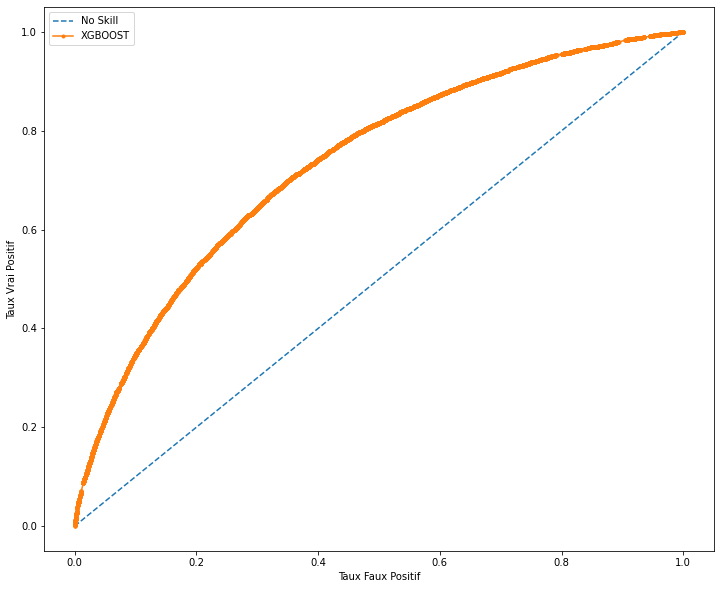

In [129]:
# Plot :

plt.figure(figsize = (12, 10))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBOOST')

pyplot.xlabel('Taux Faux Positif')
pyplot.ylabel('Taux Vrai Positif')

pyplot.legend()

pyplot.show()

# Interprétations :

- Le ROC AUC est élevé et dépasse largement le No Skill. Le XGBOOST offre des résultats significatifs.

# - APPLICATION DU METRIQUE BANCAIRE :

In [130]:
# Application :

score_bancaire_xgb = score_bancaire(y_test, y_pred_test4, fn_valeur=-2.5, fp_valeur=-1, tp_valeur=0, tn_valeur=1.5)

score_bancaire_xgb

0.6730331476141956

# Interprétations :

- Le Score Bancaire est satisfaisant. La modélisation par XGBOOST est donc appropriée.

# - FEATURE IMPORTANCE :

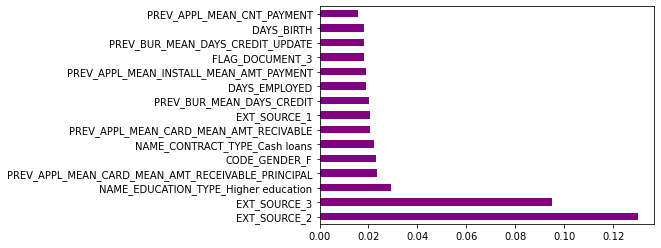

In [131]:
# Application :

feat_importances = pd.Series(xgb.feature_importances_, index=data_train_final_feat_eng_preprocessed.columns)

feat_importances.nlargest(15).plot(kind='barh', color = 'purple')

plt.show()

# Interprétations :

Les variables pesant sur la classification sont les variables de Sources Extérieures.

# - SHAP IMPORTANCE :

In [132]:
# Importation :

import shap

In [133]:
# Dataset :

X_importance = data_train_final_feat_eng_preprocessed

In [134]:
# Explication Modèle Prédiction :

explainer = shap.TreeExplainer(xgb)

shap_values = explainer.shap_values(X_importance)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


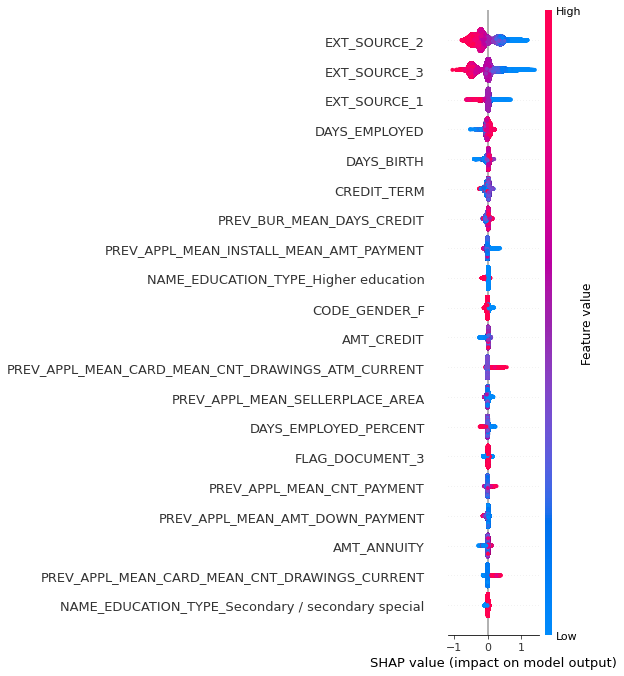

In [135]:
# Plot :

shap.summary_plot(shap_values, X_importance)

# Interprétations :

- La Valeur SHAP des Variables de Sources Extérieures a le plus d'impact sur l'orientation du Modèle.

# - RESULTATS :

In [136]:
import math
results = results.append(pd.DataFrame({
    'Modèle' : ['XGBOOST'],'Precision' : precision4, 'Recall' : recall4, 'F1':f1_xgboost,
    'ROC_AUC': lr_auc4, 'Score Métier' : score_bancaire_xgb}), ignore_index=True)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# 5- CONCLUSION :

In [137]:
# Présentation des Résultats :

results

,Modèle,Precision,Recall,F1,ROC_AUC,Score Métier
0,Baseline Régression Logistique,0.691635,0.961478,0.760940,0.753823,0.690929
1,LightGBM,0.704447,0.963937,0.770692,0.770383,0.703959
2,CATBOOST,0.693273,0.961487,0.762019,0.753080,0.692382
3,XGBOOST,0.672882,0.959478,0.747472,0.734310,0.673033


# Interprétations :

- La Modélisation par LightGBM apporte les meilleurs scores. En revanche, celle par XGBOOST apporte les moins bons résultats de toutes nos approches. J'opte donc pour une optimisation des Hyperparamètres du Modèle XGBOOST.

# C- FONCTION DE COÛT : 

# 1 - INTRODUCTION :

In [138]:
# Tests Fonctionels avec des listes contenant 4 Variables : tp, tn, fp, fn :

test_0 = [500, 300, 10, 30]
test_1 = [500, 300, 30, 10]
test_2 = [400, 300, 70, 50]
test_3 = [400, 300, 50, 70]
test_4 = [350, 250, 80, 120]
test_5 = [350, 250, 180, 90]

tests = [test_0, test_1, test_2, test_3, test_4, test_5]

def my_score(predictions_success: list) -> int:
    '''scoring fonction'''
    tp, tn, fp, fn = predictions_success
  
    beta = 3
    recall = tp / (tp + fn)
    precision = tp / (tp + fp) 
    fscore = (1+beta)*(tp / ((1+3)*tp + beta*fn + fp))
    
    return 1-fscore

for i, t in enumerate(tests):
    print("############################")
    print("Test", i, ":", t)
    print("Score :", my_score(t))

############################
Test 0 : [500, 300, 10, 30]
Score : 0.04761904761904767
############################
Test 1 : [500, 300, 30, 10]
Score : 0.029126213592232997
############################
Test 2 : [400, 300, 70, 50]
Score : 0.1208791208791209
############################
Test 3 : [400, 300, 50, 70]
Score : 0.13978494623655913
############################
Test 4 : [350, 250, 80, 120]
Score : 0.23913043478260865
############################
Test 5 : [350, 250, 180, 90]
Score : 0.2432432432432432


In [139]:
# Fonction Custom Score :

def custom_score(y_true, y_pred, beta=3) :
    '''function penalize fp and fn…'''
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred).ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    fscore = (1+beta)*((tp / ((1+beta)*tp + beta*fn + fp)))

    return 1-fscore

# 2- FONCTION COUT : TAUX D'ERREUR SELON MODELE :

# - Modèle 1 : LIGHTGBM :

In [140]:
# Fonction "Coût" LIGHTGBM :

def cost_false(lgbm, y_test, X_test):
    cm = confusion_matrix(y_test, lgbm.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [141]:
# Application :

cost_false(lgbm, y_test, X_test)

False Pos: 27.18%
False Neg: 2.42%


(0.27180393262080776, 0.024237431439287187)

# Interprétations :

- La fonction de Coût indique que nos résultats sont assez justes, le taux d'erreur pour le FP est élevé. Mais peu élévé, concernant les FN, 3%.

# - Modèle 2 : CATBOOST :

In [142]:
# Fonction "Coût" CATBOOST :

def cost_false(clf, y_test, X_test):
    cm = confusion_matrix(y_test, clf.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [143]:
# Application :

cost_false(clf, y_test, X_test)

False Pos: 28.21%
False Neg: 2.55%


(0.2820799098142086, 0.025538188046046784)

# Interprétations :

- La fonction de Coût indique que nos résultats sont assez justes, le taux d'erreur pour le FP est élevé. Assez bas, pour les FN.

# - Modèle 3 : XGBOOST :

In [144]:
# Fonction "Coût" XGBOOST :

def cost_false(xgb, y_test, X_test):
    cm = confusion_matrix(y_test, xgb.predict(X_test))
    FP = cm[0][1]/np.sum(cm)
    FN = cm[1][0]/np.sum(cm)
  
    print("False Pos: {0:.2%}".format(FP))
    print("False Neg: {0:.2%}".format(FN))
    return FP, FN

In [145]:
# Application :

cost_false(xgb, y_test, X_test)

False Pos: 30.08%
False Neg: 2.61%


(0.30083248422832615, 0.026134368157478268)

# Interprétations :

- Les résultats des Erreurs obtenues par la Fonction de Coût sont quasi identiques à ceux obtenus par LightGBM et par CATBOOST.

# 3- FONCTION DE COUT : SEUIL :

# Définition du Seuil :

La question que l'on doit se poser est : A partir de quel seuil de probabilité allons nous choisir de classer le client comme un client de confiance ou un client à risques?

Ne pas prêter d'argent à un client qui aurait remboursé son prêt est un manque à gagner pour l'entreprise.
Cependant, lorsque l'entreprise prête à un client qui ne pourra pas rembourser son prêt, il s'agit d'une perte sèche.

On peut aisement comprendre qu'il y a un plus gros risque de prêter de l'argent à un client qui ne remboursera pas son prêt, qu'il y a de gain à prêter à un client qui remboursera et payera ses intêrets.

Il nous faut donc déterminer le coût lorsque l'entreprise prête à un mauvais client comparé au coût de refuser de prêter à un bon client.

**FN**(Faux Bon Client): Prêt à tort ===> Perte du capital ou partie du capital ===> Perte de beaucoup d'argent

**FP**(Faux Mauvais Client): Refus à tort de prêt ===> Perte de Marge, Manque à gagner

Hypothèse : Imaginons que nous ayons un capital valant 100.

- FN ---> Perte de 50% du capital prêté en moyenne ---> Perte de 50
- FP ---> Manque à gagner de 1% / an sur en moyenne 10 ans (capital va de 100 à 0 soit moyenne de 50) ---> 10% de 50 ---> Perte de 5

Rapport de coût entre FN et FP:

- Les FN coûtent 10 fois plus chers que les FP.
- 1 x FN = 10FP

Objectif :

- Optimiser la Matrice de confusion en optimisant la somme de ces 2 coûts.
- Résoudre : Min(10FN + FP)
- Tester tous les seuils et calculer cette fonction.

J'ai créé la fonction findBestThreshold qui automatise cette opération.

Nous lui fournissons en paramètre:

- dictData qui sont les données générées précédemment avec la fonction bestAlgo.
- algo qui est le nom de l'algorithme à utiliser, ici LGBMClassifier(qui doit être présent dans dictData).
- formula qui est la formule à calculer et dont nous recherchons le minimum.

In [146]:
# Fonction Coût Métier :

def cout_metier(y_true, y_pred, poids_fp=10, poids_fn=1):
    tp, fp, fn, tn = confusion_matrix(y_true, y_pred).ravel()
    return fp*poids_fp + fn*poids_fn

In [147]:
# Coût de base - à optimiser :

cout_metier(y_test, y_pred_test2)

252986

# A l'aide du fbeta_score :

Dans notre cas, la valeur 0 est attribuée aux bons clients et la valeur 1 aux mauvais clients. 
Si notre modèle catégorise un bon client comme un mauvais client (prédiction 1 pour vraie valeur 0), ce n'est pas très grave. En revanche, il ne faut surtout pas catégoriser un mauvais client comme un bon client (FP = 0) :

- Précision = TP / (TP + FP) 
- Rappel = TP / (TP + FN) 

Nous voulons donc une précision le plus proche possible de 1. Nous cherchons donc un Beta qui se rapproche de 0.

In [148]:
# Importations :

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
import joblib

In [149]:
# Paramètres LGBMClassifier :

parameters = {'num_leaves':[20,40,60], 'min_child_samples':[5,10],'max_depth':[-1,5,10],
             'learning_rate':[0.05,0.1],'reg_alpha':[0,0.01]}

In [150]:
# Gridsearch CV :

cout_min = 11*y_test.shape[0]
best_beta = 0
betas = [1.3, 1.0, 0.9, 0.8, 0.7, 0.5, 0.2]
costs = []

for beta_ in betas:
    print(beta_)
    scorer = make_scorer(fbeta_score, beta=beta_)
    model = GridSearchCV(LGBMClassifier(random_state=0),
                         param_grid=parameters,
                         cv=5,
                         scoring=scorer,
                         verbose=3)

    model.fit(X_train_oversamp, y_train_oversamp)
    y_pred = model.predict(X_test)
    cout = cout_metier(y_test, y_pred)
    costs.append(cout)
    print('Coût =', cout, '; Coût_min =', cout_min)
    
    if cout < cout_min:
        cout_min = cout
        best_beta = beta_
        joblib.dump(model, '/Users/sylvaincarlevato/best_model_beta.joblib')

1.3
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0;, score=0.664 total time=   9.8s
[CV 2/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0;, score=0.990 total time=   8.7s
[CV 3/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0;, score=0.990 total time=   8.8s
[CV 4/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0;, score=0.990 total time=   8.6s
[CV 5/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0;, score=0.990 total time=   8.6s
[CV 1/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.01;, score=0.664 total time=   9.2s
[CV 2/5] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.01;, score=0.990 total time=   9.9s
[CV 3/5] END learning_rate=0.05,

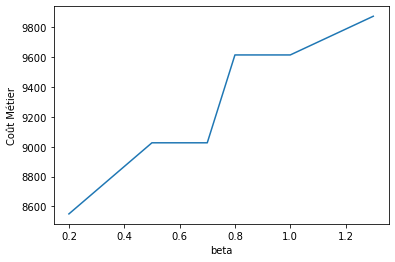

In [151]:
# Plot Coût Métier / beta :

plt.plot(betas, costs)

plt.xlabel("beta")

plt.ylabel("Coût Métier")

plt.show()

In [152]:
# Conclusion :

print('Le Coût Métier atteint son Minimum (', cout_min, ') pour beta =', best_beta)

Le Coût Métier atteint son Minimum ( 8550 ) pour beta = 0.2


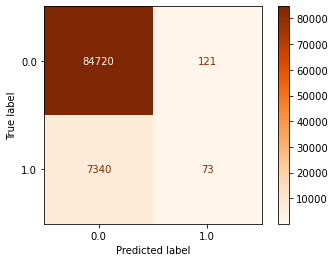

In [153]:
# Matrice de Confusion :

best_model_beta = joblib.load('/Users/sylvaincarlevato/best_model_beta.joblib')

y_pred = best_model_beta.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='', cmap='Oranges')

plt.show()

# En choisissant un Seuil :

Nous allons tester notre meilleur modèle pour différentes valeurs de seuil afin de sélectionner le meilleur.

In [154]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [155]:
# Importation :

from tqdm import tqdm

In [156]:
# Importation :

import tqdm

100%|██████████| 100/100 [00:07<00:00, 14.24it/s]


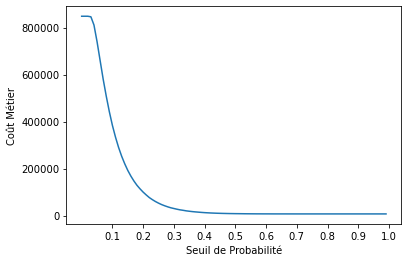

Le Coût Métier atteint son Minimum ( 7412 ) pour un Seuil de Probabilité de 0.7


In [157]:
# Seuil de Probabilité :

best_model = joblib.load('/Users/sylvaincarlevato/best_model_beta.joblib')
cost_function = []
threshold_x = []
predictions = best_model.predict_proba(X_test)
for t in tqdm.tqdm(range(100)):
    thresh = t/100
    y_pred = pd.Series(predictions[:, 1]).apply(lambda x: 1 if x >= thresh else 0)
    c = cout_metier(y_test, y_pred, poids_fp=10, poids_fn=1)
    cost_function.append(c)
    threshold_x.append(thresh)

plt.plot(threshold_x, cost_function)
plt.xlabel("Seuil de Probabilité")
plt.ylabel("Coût Métier")
plt.xticks(np.linspace(0.1, 1, 10))
plt.show()

min_ = np.argmin(cost_function)
print('Le Coût Métier atteint son Minimum (', cost_function[min_], ') pour un Seuil de Probabilité de', threshold_x[min_])

# Affichons la Matrice de Confusion pour le Seuil de Probabilité Optimal :

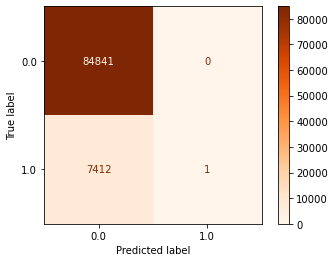

In [158]:
# Matrice de Confusion :

y_pred = pd.Series(predictions[:, 1]).apply(lambda x: 1 if x >= threshold_x[min_] else 0)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, values_format='', cmap='Oranges')

plt.show()

# D- CROSS VALIDATION : XGBOOST :

Parmi tous les modèles, j'opte pour une approche par Cross Validation de XGBOOST. 

In [159]:
# Importations :

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [160]:
# Modélisation et Split KFOLD :

model = xgb.XGBClassifier()
kfold = KFold(n_splits=10, random_state=None)
accuracies = cross_val_score(estimator = model, X = X_train_oversamp, y = y_train_oversamp, cv = kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (accuracies.mean()*100, accuracies.std()*100))

Accuracy: 95.49% (3.83%)


# Interprétations :

- Par Cross Validation, avec un nombre de 10 Folds, on atteint un score d'Accuracy de 96%. Ce qui est prometteur.

# E- RECHERCHE ET OPTIMISATION DES HYPERPARAMETRES PAR HYPEROPT : XGBOOST :

Parmi tous les modèles, j'opte pour une hyperparamétrisation de XGBOOST, via HYPEROPT. En effet, le résultat précedemment obtenu est perfectible.

In [161]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


# - XGBOOST :

In [162]:
# Importation :

from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [163]:
# Paramètres :

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [164]:
# Fonction Hyperparamètres :

def objective(space):

    xgboost = XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_oversamp, y_train_oversamp), (X_test, y_test)]
    
    xgboost.fit(X_train_oversamp, y_train_oversamp,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = xgboost.predict(X_test)
    accuracy = accuracy_score(y_test, pred > 0.5)

    print ("SCORE ACCURACY :", accuracy)

    return {'loss': -accuracy, 'status': STATUS_OK }

In [165]:
# Essais :

trials = Trials()

In [166]:
# Recherche des Meilleurs Paramètres :

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                       
0.8797125327899061                                     
  1%|          | 1/100 [00:11<19:13, 11.65s/trial, best loss: -0.8797125327899061]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8840592277841611                                                                
  2%|▏         | 2/100 [00:23<19:19, 11.84s/trial, best loss: -0.8840592277841611]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8664990135929065                                                                
  3%|▎         | 3/100 [00:39<21:53, 13.54s/trial, best loss: -0.8840592277841611]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8867149391896286                                                                
  4%|▍         | 4/100 [00:55<23:16, 14.55s/trial, best loss: -0.8867149391896286]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.9153857827302881                                                                
  5%|▌         | 5/100 [01:23<30:59, 19.58s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8490255165087692                                                                
  6%|▌         | 6/100 [01:34<26:03, 16.63s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8866824202744596                                                                
  7%|▋         | 7/100 [01:50<25:26, 16.42s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8850347952392308                                                                
  8%|▊         | 8/100 [02:06<24:54, 16.24s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.8862705140156525                                                                
  9%|▉         | 9/100 [02:25<26:02, 17.17s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                  
0.888893706505951                                                                 
 10%|█         | 10/100 [02:37<23:25, 15.62s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8687861772931255                                                                 
 11%|█         | 11/100 [02:49<21:19, 14.37s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8223816853469769                                                                 
 12%|█▏        | 12/100 [02:58<18:43, 12.77s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8695666312571813                                                                 
 13%|█▎        | 13/100 [03:10<17:58, 12.40s/trial, best loss: -0.9153857827302881]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9157976889890953                                                                 
 14%|█▍        | 14/100 [03:39<25:02, 17.47s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8363214603160839                                                                 
 15%|█▌        | 15/100 [03:49<21:47, 15.38s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8870184490645392                                                                 
 16%|█▌        | 16/100 [04:05<21:49, 15.59s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8676046567086522                                                                 
 17%|█▋        | 17/100 [04:21<21:41, 15.68s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8880373750731676                                                                 
 18%|█▊        | 18/100 [04:37<21:34, 15.78s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9147679233420773                                                                 
 19%|█▉        | 19/100 [05:06<26:41, 19.77s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8789537581026297                                                                 
 20%|██        | 20/100 [05:18<23:13, 17.42s/trial, best loss: -0.9157976889890953]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9160795195872266                                                                 
 21%|██        | 21/100 [05:47<27:33, 20.93s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8869859301493702                                                                 
 22%|██▏       | 22/100 [06:00<23:48, 18.31s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8890779803585752                                                                 
 23%|██▎       | 23/100 [06:16<22:50, 17.80s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8860320419710799                                                                 
 24%|██▍       | 24/100 [06:29<20:28, 16.17s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8861512779933661                                                                 
 25%|██▌       | 25/100 [06:41<18:48, 15.05s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8884384416935851                                                                 
 26%|██▌       | 26/100 [06:58<19:24, 15.74s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8869642508725909                                                                 
 27%|██▋       | 27/100 [07:11<18:08, 14.92s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.869219762828712                                                                  
 28%|██▊       | 28/100 [07:24<17:00, 14.17s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8860428816094695                                                                 
 29%|██▉       | 29/100 [07:36<16:02, 13.55s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8899017928761896                                                                 
 30%|███       | 30/100 [07:52<16:50, 14.43s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8866173824441217                                                                 
 31%|███       | 31/100 [08:12<18:16, 15.89s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9155917358596917                                                                 
 32%|███▏      | 32/100 [08:41<22:35, 19.93s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.875788583692848                                                                  
 33%|███▎      | 33/100 [08:57<20:49, 18.64s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8858477681184556                                                                 
 34%|███▍      | 34/100 [09:09<18:20, 16.67s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8828560279229085                                                                 
 35%|███▌      | 35/100 [09:21<16:42, 15.43s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8866824202744596                                                                 
 36%|███▌      | 36/100 [09:33<15:24, 14.44s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9151906692392742                                                                 
 37%|███▋      | 37/100 [10:02<19:44, 18.80s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8846770871723719                                                                 
 38%|███▊      | 38/100 [10:19<18:51, 18.26s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9155592169445227                                                                 
 39%|███▉      | 39/100 [10:49<21:56, 21.58s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.874531185639647                                                                  
 40%|████      | 40/100 [11:05<19:51, 19.86s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8742059964879572                                                                 
 41%|████      | 41/100 [11:17<17:21, 17.65s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8870076094261495                                                                 
 42%|████▏     | 42/100 [11:33<16:33, 17.13s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.890758124308973                                                                  
 43%|████▎     | 43/100 [11:51<16:34, 17.45s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8865740238905631                                                                 
 44%|████▍     | 44/100 [12:04<14:59, 16.05s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.91371647841828                                                                   
 45%|████▌     | 45/100 [12:34<18:31, 20.21s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8855659375203243                                                                 
 46%|████▌     | 46/100 [12:46<16:04, 17.86s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8743794307021918                                                                 
 47%|████▋     | 47/100 [12:59<14:18, 16.19s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8138508899343118                                                                 
 48%|████▊     | 48/100 [13:09<12:39, 14.61s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8872569211091118                                                                 
 49%|████▉     | 49/100 [13:26<12:55, 15.20s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8831378585210398                                                                 
 50%|█████     | 50/100 [13:38<11:50, 14.20s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8440176035727448                                                                 
 51%|█████     | 51/100 [13:49<10:52, 13.31s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9157651700739263                                                                 
 52%|█████▏    | 52/100 [14:21<15:05, 18.85s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8905088126260108                                                                 
 53%|█████▎    | 53/100 [14:40<14:48, 18.91s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8861512779933661                                                                 
 54%|█████▍    | 54/100 [14:58<14:21, 18.74s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8880265354347779                                                                 
 55%|█████▌    | 55/100 [15:15<13:36, 18.13s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8886335551845991                                                                 
 56%|█████▌    | 56/100 [15:33<13:17, 18.12s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8860970798014178                                                                 
 57%|█████▋    | 57/100 [15:46<11:50, 16.53s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8778806339020531                                                                 
 58%|█████▊    | 58/100 [16:02<11:31, 16.46s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8831486981594294                                                                 
 59%|█████▉    | 59/100 [16:14<10:21, 15.15s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9158302079042643                                                                 
 60%|██████    | 60/100 [16:44<13:01, 19.54s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8108266308235957                                                                 
 61%|██████    | 61/100 [16:55<10:56, 16.82s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8891104992737442                                                                 
 62%|██████▏   | 62/100 [17:12<10:41, 16.88s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.876623235848852                                                                  
 63%|██████▎   | 63/100 [17:27<10:11, 16.52s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8864331085914974                                                                 
 64%|██████▍   | 64/100 [17:44<09:54, 16.52s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8213519196999588                                                                 
 65%|██████▌   | 65/100 [17:53<08:24, 14.43s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9157001322435884                                                                 
 66%|██████▌   | 66/100 [18:23<10:41, 18.86s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8866173824441217                                                                 
 67%|██████▋   | 67/100 [18:35<09:14, 16.80s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9158844060962126                                                                 
 68%|██████▊   | 68/100 [19:04<10:57, 20.55s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9157868493507056                                                                 
 69%|██████▉   | 69/100 [19:34<12:06, 23.44s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8867366184664079                                                                 
 70%|███████   | 70/100 [19:47<10:10, 20.36s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.915743490797147                                                                  
 71%|███████   | 71/100 [20:17<11:10, 23.11s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8904437747956728                                                                 
 72%|███████▏  | 72/100 [20:33<09:53, 21.18s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8906822468402454                                                                 
 73%|███████▎  | 73/100 [20:50<08:56, 19.86s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8857610510113383                                                                 
 74%|███████▍  | 74/100 [21:03<07:37, 17.59s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.914811281895636                                                                  
 75%|███████▌  | 75/100 [21:32<08:49, 21.20s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8907256053938041                                                                 
 76%|███████▌  | 76/100 [21:49<07:58, 19.95s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8841134259761094                                                                 
 77%|███████▋  | 77/100 [22:01<06:45, 17.64s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8891538578273028                                                                 
 78%|███████▊  | 78/100 [22:18<06:20, 17.32s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8859453248639625                                                                 
 79%|███████▉  | 79/100 [22:30<05:32, 15.82s/trial, best loss: -0.9160795195872266]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.9165239447612028                                                                 
 80%|████████  | 80/100 [23:01<06:44, 20.25s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8859886834175212                                                                 
 81%|████████  | 81/100 [23:14<05:41, 17.97s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8562880742298437                                                                 
 82%|████████▏ | 82/100 [23:25<04:50, 16.15s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8878097426669846                                                                 
 83%|████████▎ | 83/100 [23:44<04:46, 16.83s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8751165261126889                                                                 
 84%|████████▍ | 84/100 [23:56<04:05, 15.37s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.83805580245843                                                                   
 85%|████████▌ | 85/100 [24:07<03:32, 14.15s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8857935699265073                                                                 
 86%|████████▌ | 86/100 [24:22<03:19, 14.24s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8867691373815769                                                                 
 87%|████████▋ | 87/100 [24:35<03:00, 13.88s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8876146291759707                                                                 
 88%|████████▊ | 88/100 [24:48<02:43, 13.62s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8804279489236239                                                                 
 89%|████████▉ | 89/100 [25:00<02:24, 13.18s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8858369284800659                                                                 
 90%|█████████ | 90/100 [25:18<02:25, 14.58s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8824116027489323                                                                 
 91%|█████████ | 91/100 [25:31<02:07, 14.12s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8869100526806426                                                                 
 92%|█████████▏| 92/100 [25:48<02:00, 15.07s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8890779803585752                                                                 
 93%|█████████▎| 93/100 [26:01<01:40, 14.42s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8698484618553125                                                                 
 94%|█████████▍| 94/100 [26:13<01:22, 13.69s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8864656275066664                                                                 
 95%|█████████▌| 95/100 [26:25<01:06, 13.37s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8879398183276606                                                                 
 96%|█████████▌| 96/100 [26:42<00:57, 14.46s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8850889934311791                                                                 
 97%|█████████▋| 97/100 [26:59<00:45, 15.01s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.915548377306133                                                                  
 98%|█████████▊| 98/100 [27:30<00:39, 19.75s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8866173824441217                                                                 
 99%|█████████▉| 99/100 [27:42<00:17, 17.66s/trial, best loss: -0.9165239447612028]

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



SCORE ACCURACY :                                                                   
0.8879506579660502                                                                 
100%|██████████| 100/100 [28:00<00:00, 16.80s/trial, best loss: -0.9165239447612028]


In [167]:
# Résultats :

print("Les Meilleurs Hyperparamètres sont : ","\n")

print(best_hyperparams)

Les Meilleurs Hyperparamètres sont :  

{'colsample_bytree': 0.8398859249626246, 'gamma': 4.157166781356812, 'max_depth': 17.0, 'min_child_weight': 10.0, 'reg_alpha': 40.0, 'reg_lambda': 0.8451927793768117}
